In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [36]:
df = pd.read_csv("2015_trip_data.csv")

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


## Q1 create a dataframe with station counts averages by day-of-week

In [4]:
start_day = [pd.to_datetime(x).dayofweek+1 for x in df.starttime]
stop_day = [pd.to_datetime(x).dayofweek+1 for x in df.stoptime]

In [5]:
df['startday'] = start_day
df['stopday'] = stop_day

In [6]:
groupby_day_from = df.groupby(['startday','from_station_id']).size()
groupby_day_to = df.groupby(['stopday','to_station_id']).size()

In [7]:
count_dayofweek = pd.DataFrame({'From': groupby_day_from.sort_index(), 'To': groupby_day_to.sort_index()})

In [8]:
count_dayofweek.columns.names = ['station']

In [35]:
# station counts averages by day-of-week, the number of each day of week is 52 in a year
count_dayofweek['Difference(From-To)'] = (count_dayofweek['From']-count_dayofweek['To'])/52
count_dayofweek

station     From    To  Difference(From-To)
1 BT-01    806.0   791             0.288462
  BT-03    577.0   534             0.826923
  BT-04    387.0   328             1.134615
  BT-05    500.0   507            -0.134615
  CBD-03   467.0   623            -3.000000
  CBD-04   107.0    88             0.365385
  CBD-05   416.0   621            -3.942308
  CBD-06   460.0   721            -5.019231
  CBD-07   235.0   267            -0.615385
  CBD-13   840.0  1048            -4.000000
  CD-01     67.0    58             0.173077
  CH-01    503.0   286             4.173077
  CH-02    725.0   436             5.557692
  CH-03    490.0   349             2.711538
  CH-05    590.0   178             7.923077
  CH-06    260.0    85             3.365385
  CH-07    807.0   238            10.942308
  CH-08    684.0   433             4.826923
  CH-09    417.0   294             2.365385
  CH-12    357.0   261             1.846154
  CH-15    410.0   169             4.634615
  DPD-01   416.0   563            -2.826923
  DPD-03   137.0   117             0.384615
  EL-01    253.0   306            -1.019231
  EL-03    408.0   551            -2.750000
  EL-05    273.0   342            -1.326923
  FH-01    295.0   105             3.653846
  FH-04    313.0   209             2.000000
  ID-04    193.0   320            -2.442308
  PS-04    390.0   613            -4.288462
...          ...   ...                  ...
7 EL-03    303.0   344            -0.788462
  EL-05    346.0   404            -1.115385
  FH-01    223.0   107             2.230769
  FH-04    193.0   166             0.519231
  ID-04    210.0   295            -1.634615
  PS-04    409.0   586            -3.403846
  PS-05    204.0   335            -2.519231
  SLU-01   375.0   428            -1.019231
  SLU-02   274.0   293            -0.365385
  SLU-04   224.0   319            -1.826923
  SLU-07   323.0   413            -1.730769
  SLU-15   497.0   558            -1.173077
  SLU-16   300.0   394            -1.807692
  SLU-17   593.0   647            -1.038462
  SLU-18   259.0   233             0.500000
  SLU-19   555.0   598            -0.826923
  SLU-20    76.0    77            -0.019231
  SLU-21    12.0     7             0.096154
  UD-01    342.0   348            -0.115385
  UD-02    101.0    82             0.365385
  UD-04    295.0   376            -1.557692
  UD-07    182.0   162             0.384615
  UW-01     55.0    55             0.000000
  UW-02    188.0   137             0.980769
  UW-04    227.0   222             0.096154
  UW-06    128.0   135            -0.134615
  UW-07    105.0   134            -0.557692
  UW-10    114.0   147            -0.634615
  WF-01   1188.0  1324            -2.615385
  WF-04    598.0   785            -3.596154

[383 rows x 3 columns]

## Q2 structure the 7 day-of-week plots as subplots

In [11]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts:
      plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
      plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts:
      plt.ylim(opts['ylim'])
    if 'title' in opts:
      plt.title(opts['title'])

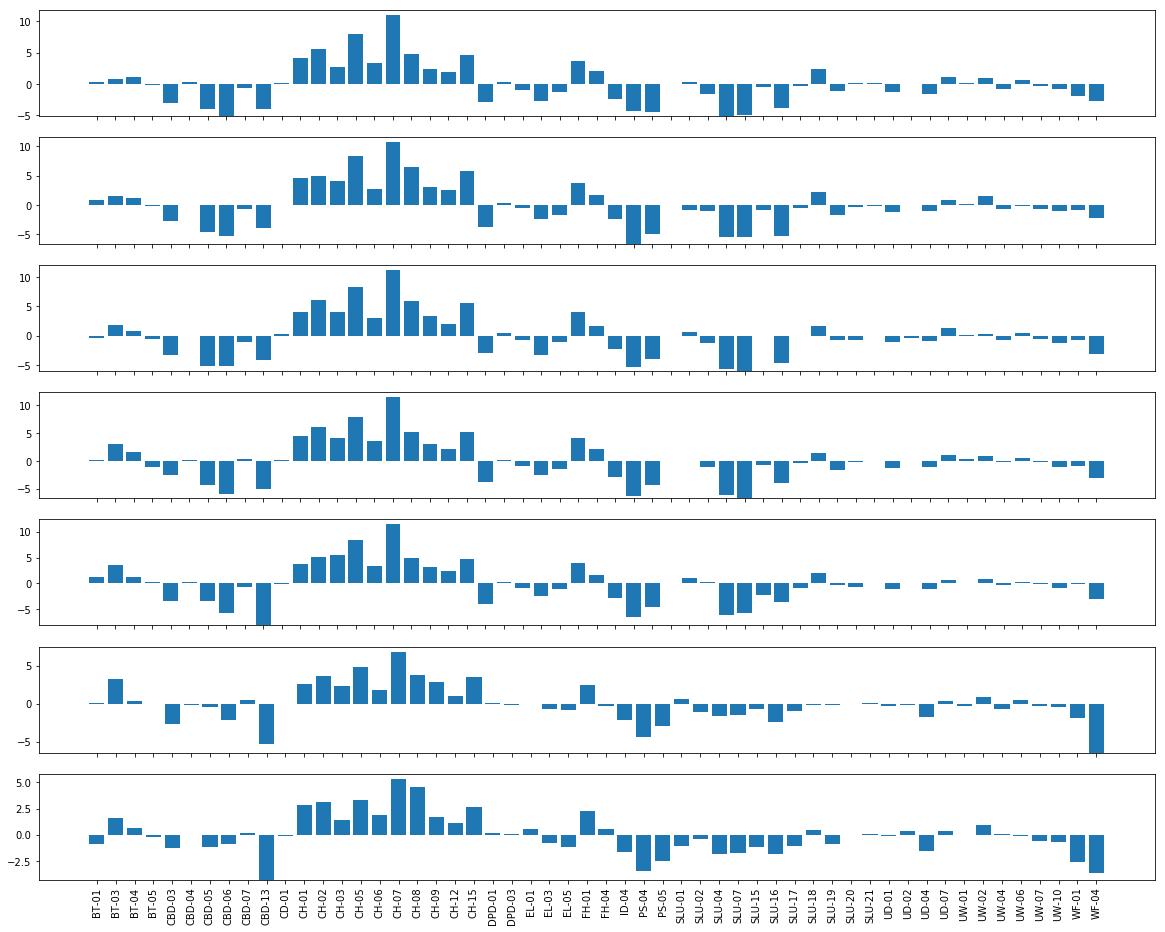

In [24]:
def plot_barN(df, dayOfWeek, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_plots = len(dayOfWeek)
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for i in range(len(dayOfWeek)):
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        if 'title' in opts:
            local_opts['title'] = opts['title'][i]
        if idx == num_plots:
            local_opts['xticks'] = True
            if 'xlabel' in opts:
                local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_plots, 1, idx)
        plot_bar1(df.ix[idx],'Difference(From-To)', local_opts)
    
fig = plt.figure(figsize=(20,16))
dayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
opts = {}
plot_barN(count_dayofweek, dayOfWeek, opts)

## Q3 label the plots by day-of-week

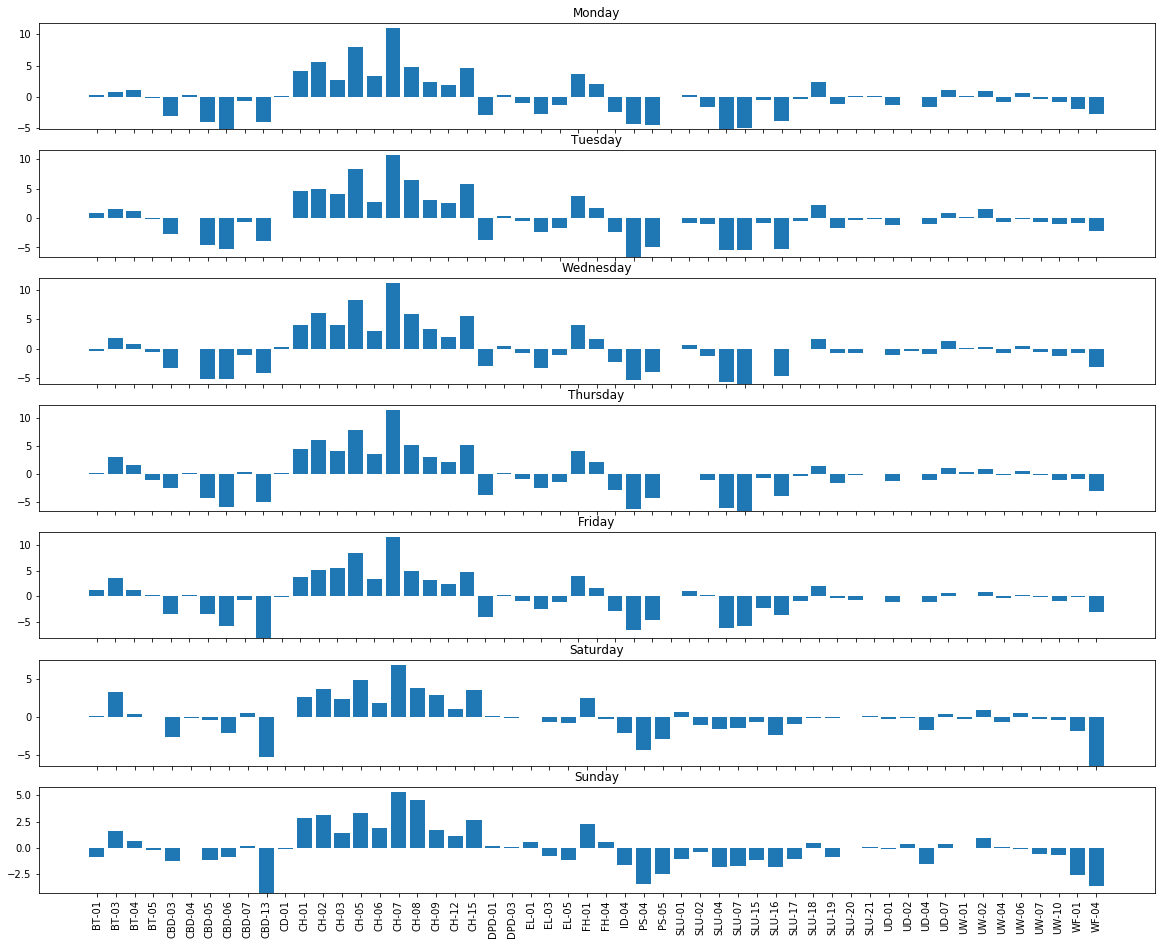

In [25]:
fig = plt.figure(figsize=(20,16))
dayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
opts = {'title':dayOfWeek}
plot_barN(count_dayofweek, dayOfWeek, opts)

## Q4 label the x-axis for plots in the last row and label the y-axis for plots in the left-most column

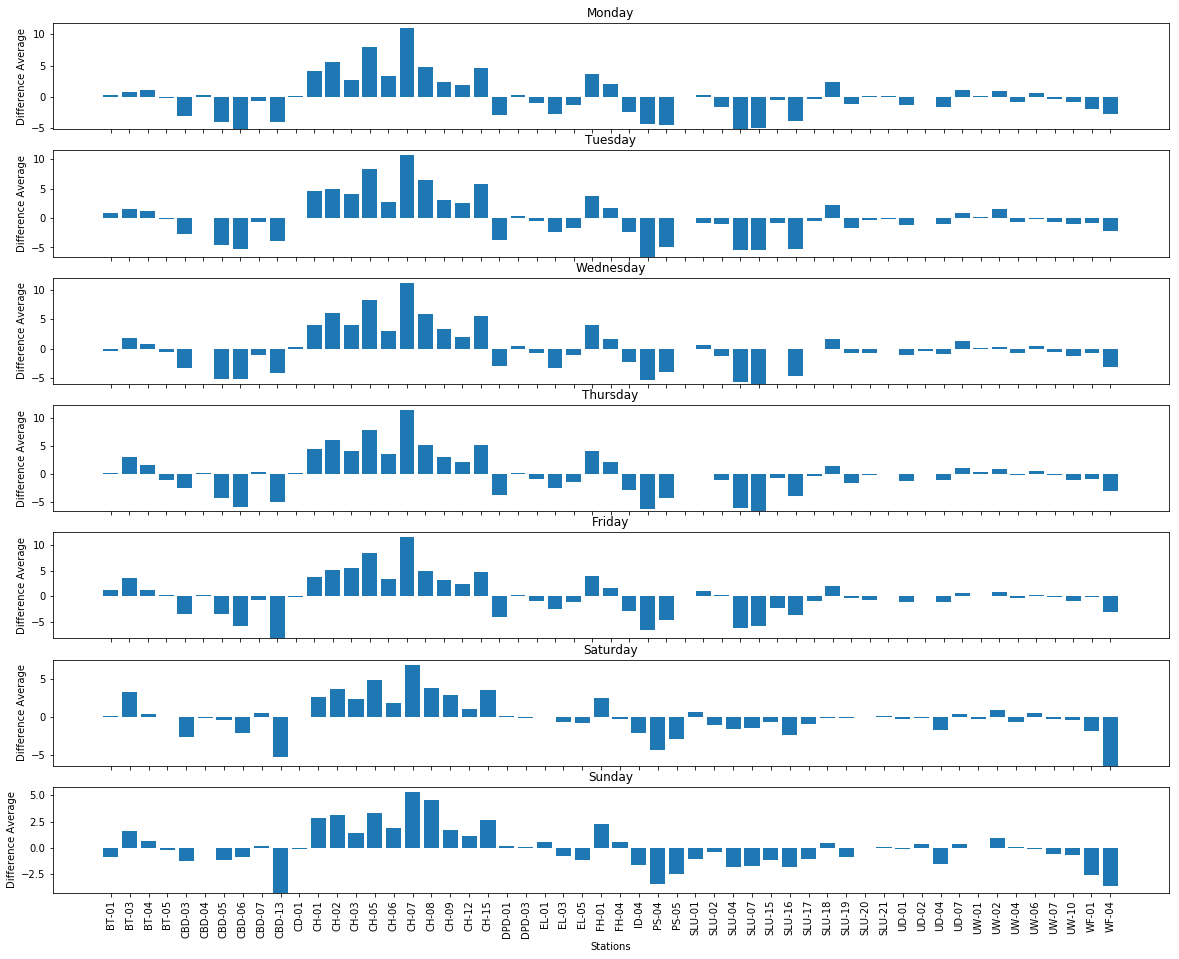

In [23]:
fig = plt.figure(figsize=(20,16))
dayOfWeek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
opts = {'xlabel': 'Stations', 'ylabel': 'Difference Average', 'title':dayOfWeek}
plot_barN(count_dayofweek, dayOfWeek, opts)